# Tracking the **Evolution of Science Worldwide** by Extracting Monthly ArXiv Publications

This code presents an easy way of tracking the evolution of science worldwide, by categories of knowledge, by counting the number of monthly publications in ArXiv.

Check **ArXiv's category taxonomy [here](https://arxiv.org/category_taxonomy)**.

In [5]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

In [9]:
# Function to generate URLs for each month
def generate_urls(start_year, end_year, category):
    urls = []
    start_date = datetime(start_year, 1, 1)
    end_date = datetime(end_year, 12, 31)
    current_date = start_date

    while current_date <= end_date:
        year = current_date.year
        month = current_date.month
        urls.append(f"https://arxiv.org/list/{category}/{year}-{month:02d}")
        current_date += relativedelta(months=1)  # Move to the next month
    return urls

# Function to scrape the count of entries
def get_entry_count(url):
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        # Find the 'paging' div and extract the "Total of X entries" text
        paging_div = soup.find('div', class_='paging')
        if paging_div:
            text = paging_div.text.strip()
            if "Total of" in text:
                count = int(text.split("Total of ")[1].split(" entries")[0])
                return count
    return None

# Main loop
def extract_monthly_publications(start_year, end_year, category):
    urls = generate_urls(start_year, end_year, category)
    publication_counts = {}

    for url in urls:
        year_month = url.split("/")[-1]
        print(f"Fetching data for {year_month}...")
        count = get_entry_count(url)
        if count is not None:
            publication_counts[year_month] = count
        else:
            publication_counts[year_month] = "Failed to retrieve"

    return publication_counts

# Example usage: Evolution of AI publications (CS.AI category), from 2017 to 2024
start_year = 2017
end_year = 2024
ai = extract_monthly_publications(start_year, end_year, "cs.AI")

Fetching data for 2017-01...
Fetching data for 2017-02...
Fetching data for 2017-03...
Fetching data for 2017-04...
Fetching data for 2017-05...
Fetching data for 2017-06...
Fetching data for 2017-07...
Fetching data for 2017-08...
Fetching data for 2017-09...
Fetching data for 2017-10...
Fetching data for 2017-11...
Fetching data for 2017-12...
Fetching data for 2018-01...
Fetching data for 2018-02...
Fetching data for 2018-03...
Fetching data for 2018-04...
Fetching data for 2018-05...
Fetching data for 2018-06...
Fetching data for 2018-07...
Fetching data for 2018-08...
Fetching data for 2018-09...
Fetching data for 2018-10...
Fetching data for 2018-11...
Fetching data for 2018-12...
Fetching data for 2019-01...
Fetching data for 2019-02...
Fetching data for 2019-03...
Fetching data for 2019-04...
Fetching data for 2019-05...
Fetching data for 2019-06...
Fetching data for 2019-07...
Fetching data for 2019-08...
Fetching data for 2019-09...
Fetching data for 2019-10...
Fetching data 

<Axes: ylabel='arXiv Publications on AI'>

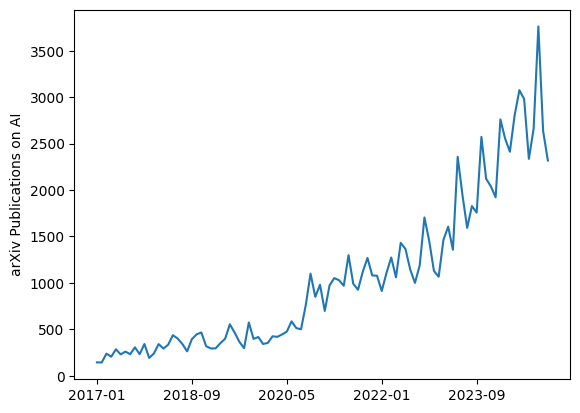

In [11]:
# Visualization
pd.Series(ai).plot(ylabel='arXiv Publications on AI')